<a href="https://colab.research.google.com/github/rifat01-rahman/Sensor-Faulting/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
!pip install pandas
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv ('/content/wafer_23012020_041211.csv')

In [ ]:
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, Unnamed: 0 to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 462.6+ KB


In [ ]:
# Percentage of missing value
def overall_missing_percentage(dk):
    total_missing = dk.isnull().sum().sum()
    total_cells = dk.size
    overall_missing_percentage = (total_missing / total_cells) * 100
    return overall_missing_percentage

In [ ]:
# percentage of missing values in our data
percen_missing_value = overall_missing_percentage (df)
print(f"Overall percentage of missing values: {percen_missing_value:.2f}%")

Overall percentage of missing values: 3.90%


In [ ]:
class_distribution= df["Good/Bad"].value_counts() # To check the balance of Target variable

In [ ]:
class_proportion= df["Good/Bad"].value_counts(normalize=True)*100
print(class_proportion)

Good/Bad
-1    94.0
 1     6.0
Name: proportion, dtype: float64


In [ ]:
# We have to substract categorical values
m_df = df.iloc[:,1:591]

In [ ]:
import random

In [ ]:
# Descriptive Statistics for all columns:
m_df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,0.004994,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,0.002934,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,0.001700,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,0.002900,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,0.003850,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,0.005975,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,0.015000,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800


We have created a def function for cleaning our whole data, where It will help to substract the columns whos column has zero standerd deviation and percentage of the missing value per column greater than 30% .

In [ ]:
def clean_data (dl):
    zero_std_column = [col for col in dl.columns if dl[col].std() == 0] # Columns which have zero Std.
    missing_percentage = (dl.isnull().sum() / len(dl)) * 100 # Calculate percentage missing values
    high_missing_columns = [col for col in dl.columns if missing_percentage[col] > 30]
    columns_to_drop = set(zero_std_column + high_missing_columns) # combine both columns
    clean_data = dl.drop(columns=columns_to_drop)
    return clean_data

In [ ]:
mf_data = clean_data(m_df)

In [ ]:
mf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 440 entries, Sensor-1 to Sensor-590
dtypes: float64(434), int64(6)
memory usage: 343.9 KB


In [ ]:
mf_data.isnull().sum().sum() # missing value

np.int64(593)

In [ ]:
# Find Outliers
Q1 = mf_data.quantile(0.25)
Q3 = mf_data.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((mf_data < (Q1 - 1.5 * IQR)) | (mf_data > (Q3 + 1.5 * IQR))).any(axis=1)
num_outliers = outlier_mask.sum()

print(f"Number of outliers using IQR: {num_outliers}")

Number of outliers using IQR: 100


In [ ]:
from scipy import stats
from sklearn.impute import KNNImputer

In [ ]:
def fill_missing_values(du): # We have made a def function for continuous variable and our main purpose is to fill the missing values by KNNI inputer
  inputer= KNNImputer(n_neighbors=2)
  du_input = inputer.fit_transform(du)
  du = pd.DataFrame(du_input, columns=du.columns)
  return(du)

In [ ]:
clean_1 = fill_missing_values (mf_data)
print (clean_1)

    Sensor-1  Sensor-2   Sensor-3    Sensor-4  Sensor-5   Sensor-7  Sensor-8  \
0    2968.33   2476.58  2216.7333  1748.08850    1.1127   97.58220   0.12420   
1    2961.04   2506.43  2170.0666  1364.51570    1.5447   96.77000   0.12300   
2    3072.03   2500.68  2205.7445  1363.10480    1.0518  101.86440   0.12200   
3    3021.83   2419.83  2205.7445  1363.10480    1.0518  101.86440   0.12200   
4    3006.95   2435.34  2189.8111  1084.65020    1.1993  104.88560   0.12340   
..       ...       ...        ...         ...       ...        ...       ...   
95   3013.66   2526.44  2185.2111  1141.63060    0.8447  100.59780   0.12170   
96   2982.87   2477.01  2315.2667  2360.13250    1.1259   90.11440   0.11600   
97   3084.82   2387.42  2171.5000  1028.44400    0.7899  101.51220   0.12240   
98   2955.87   2541.89  2188.6889  1494.46405    1.0263   95.22665   0.12265   
99   2914.86   2465.11  2210.2778  2120.57600    1.0700   95.10890   0.12300   

    Sensor-9  Sensor-10  Sensor-11  ...

In [ ]:
clean_1.isnull().sum().sum()

np.int64(0)

In [ ]:
clean_1.duplicated().sum()

np.int64(0)

Standardization of the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df_standardized = pd.DataFrame(scaler.fit_transform(clean_1), columns=clean_1.columns)

In [ ]:
df_standardized.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-577,Sensor-578,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,-0.685423,-0.159119,0.493221,0.596418,-0.193967,0.014929,1.025129,0.965350,-2.665828,-0.767199,...,-0.158184,0.020080,0.295872,-0.373626,-0.286776,-0.367656,2.597385,0.468782,0.324193,-0.795964
1,-0.787911,0.288954,-1.074064,-0.246465,1.064318,-0.133544,0.417195,-0.933380,0.772667,0.566605,...,-0.175360,-0.380354,0.002929,-0.489299,-0.517118,-0.488029,2.597385,0.468782,0.324193,-0.795964
2,0.772459,0.202642,0.124166,-0.249565,-0.371350,0.797732,-0.089417,-1.013727,1.284179,-0.244138,...,-0.158184,0.020080,-0.202131,-0.419895,0.058737,-0.407819,2.597385,0.468782,0.324193,-0.795964
3,0.066715,-1.010983,0.124166,-0.249565,-0.371350,0.797732,-0.089417,-0.714892,-0.458750,-0.557975,...,-0.158184,0.020080,-1.754728,-0.304222,0.519422,-0.269660,2.597385,0.468782,0.324193,-0.795964
4,-0.142478,-0.778166,-0.410952,-0.861457,0.058273,1.350019,0.619840,0.674972,-0.458750,1.338119,...,-0.158824,-0.154331,-0.202131,0.204742,0.634593,0.197144,2.597385,0.468782,0.324193,-0.795964


In [ ]:
df_standardized ["Good/Bad"]=df["Good/Bad"]

In [ ]:
df = df.rename (columns={'Unnamed: 0': 'Wafer_name'})

In [ ]:
df_standardized ["Wafer_name"]=df["Wafer_name"]

In [ ]:
final_df =df_standardized.copy()

In [ ]:
final_df


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad,Wafer_name
0,-0.685423,-0.159119,0.493221,0.596418,-0.193967,0.014929,1.025129,0.965350,-2.665828,-0.767199,...,0.295872,-0.373626,-0.286776,-0.367656,2.597385,0.468782,0.324193,-0.795964,-1,Wafer-801
1,-0.787911,0.288954,-1.074064,-0.246465,1.064318,-0.133544,0.417195,-0.933380,0.772667,0.566605,...,0.002929,-0.489299,-0.517118,-0.488029,2.597385,0.468782,0.324193,-0.795964,1,Wafer-802
2,0.772459,0.202642,0.124166,-0.249565,-0.371350,0.797732,-0.089417,-1.013727,1.284179,-0.244138,...,-0.202131,-0.419895,0.058737,-0.407819,2.597385,0.468782,0.324193,-0.795964,-1,Wafer-803
3,0.066715,-1.010983,0.124166,-0.249565,-0.371350,0.797732,-0.089417,-0.714892,-0.458750,-0.557975,...,-1.754728,-0.304222,0.519422,-0.269660,2.597385,0.468782,0.324193,-0.795964,-1,Wafer-804
4,-0.142478,-0.778166,-0.410952,-0.861457,0.058273,1.350019,0.619840,0.674972,-0.458750,1.338119,...,-0.202131,0.204742,0.634593,0.197144,2.597385,0.468782,0.324193,-0.795964,-1,Wafer-805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.048145,0.589320,-0.565441,-0.736245,-0.974569,0.566193,-0.241401,1.017505,0.829501,0.514299,...,0.559521,-1.391553,-1.668829,-1.390885,-0.688110,-1.339852,-1.187381,-0.846483,-1,Wafer-896
96,-0.481011,-0.152665,3.802430,1.941357,-0.155519,-1.350214,-3.129088,0.112542,0.649525,2.567311,...,0.266578,-0.697512,-0.862631,-0.689646,-0.688110,-1.339852,-1.187381,-0.846483,1,Wafer-897
97,0.952269,-1.497484,-1.025924,-0.984967,-1.134185,0.733349,0.113228,-1.426739,-0.316664,0.880441,...,0.647404,-0.142279,-0.862631,-0.161565,-0.688110,-1.339852,-1.187381,-0.846483,-1,Wafer-898
98,-0.860594,0.821238,-0.448641,0.039090,-0.445624,-0.415674,0.239881,-0.172197,-1.860671,-0.479516,...,0.852464,0.089069,-0.286776,0.061624,-0.688110,-1.339852,-1.187381,-0.846483,-1,Wafer-899


In [ ]:
 final_df['Sensor-2'].describe()


,Sensor-2
count,1.000000e+02
mean,2.120526e-16
std,1.005038e+00
min,-3.485367e+00
25%,-6.092188e-01
50%,1.007181e-01
75%,6.056071e-01
max,2.662015e+00


In [ ]:
# Slicing our data into two parts, one train data another is test data.
from sklearn.model_selection import train_test_split
final_df, test_df = train_test_split(final_df, test_size=0.2, random_state=42)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Columns: 442 entries, Sensor-1 to Wafer_name
dtypes: float64(440), int64(1), object(1)
memory usage: 276.9+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 83 to 31
Columns: 442 entries, Sensor-1 to Wafer_name
dtypes: float64(440), int64(1), object(1)
memory usage: 69.2+ KB


In [ ]:
slice_data = final_df.iloc[:, 0:440]

In [ ]:
slice_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Columns: 440 entries, Sensor-1 to Sensor-590
dtypes: float64(440)
memory usage: 275.6 KB


Afetr cleaning the data as we have nomalized our data. Now, we can plot normal distribution curve to visual the distributions.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
numeric_columns = final_df.columns.tolist() # to get exess all the numeric columns

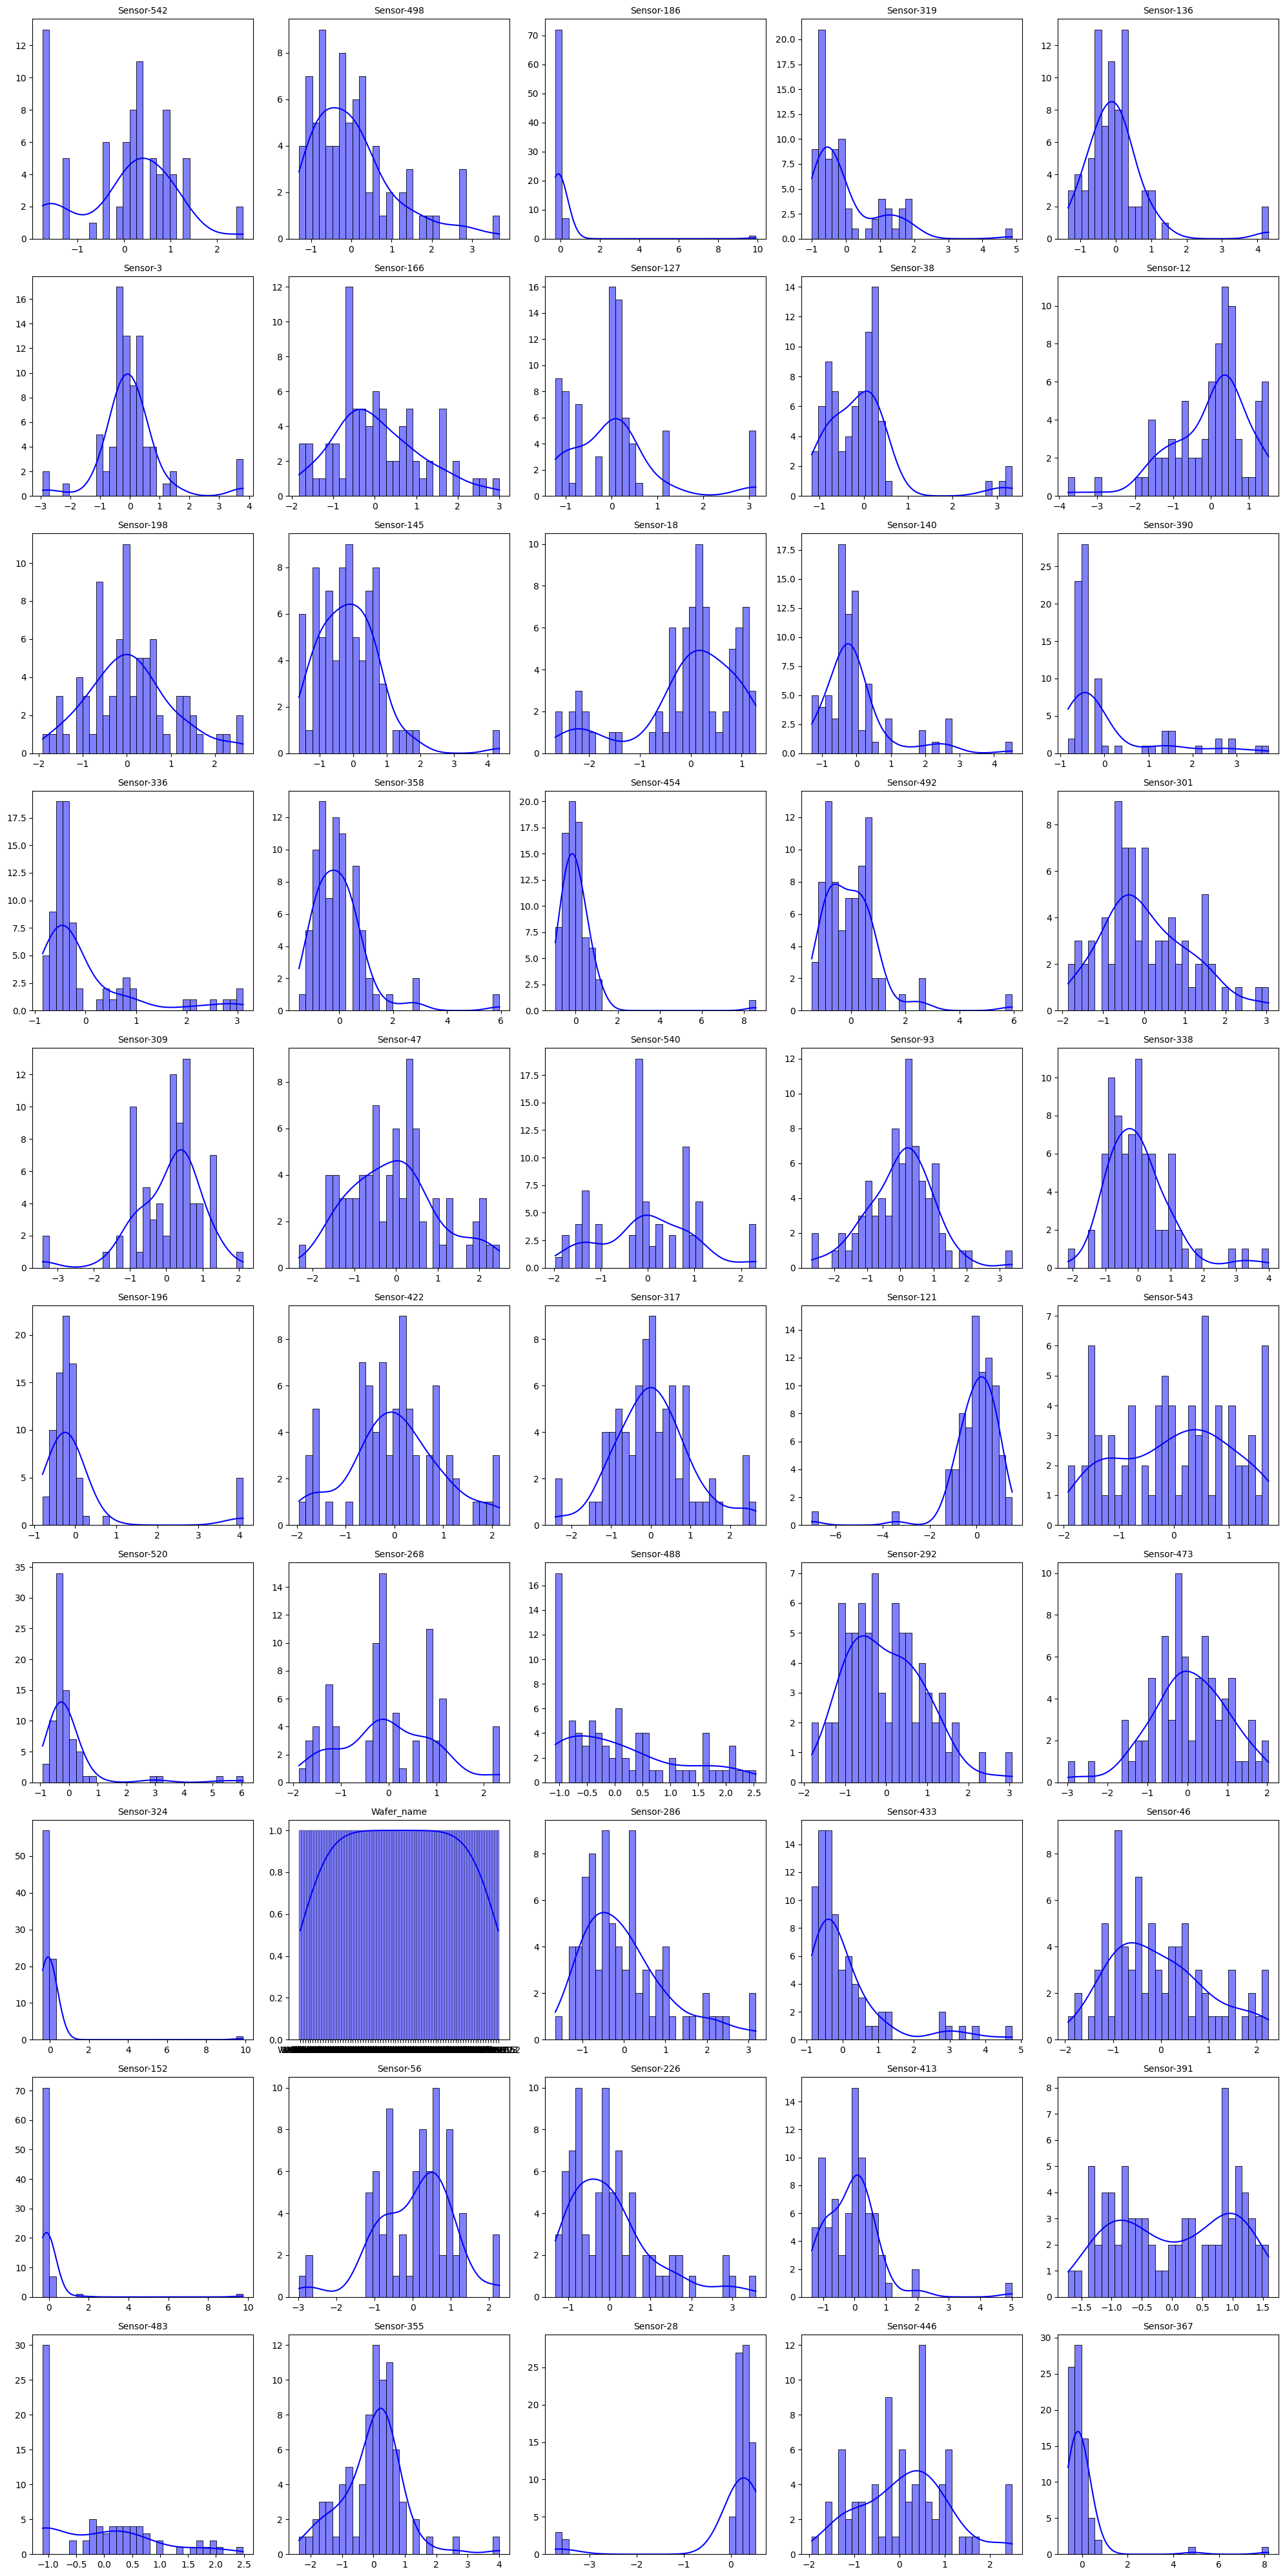

In [ ]:
random_columns = random.sample(numeric_columns, min(50, len(numeric_columns)))
n_cols = 5  # Number of plots per row
n_rows = -(-len(random_columns) // n_cols)  # Calculate rows needed

plt.figure(figsize=(20, n_rows * 4))  # Adjust figure size

# Iterate over the selected columns and plot
for i, column in enumerate(random_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create subplot (But I didn't get this line of code)
    sns.histplot(final_df[column].dropna(), kde=True, bins=30, color='blue')
    plt.title(f'{column}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# We have to make bolance data from imbalance data by using SMOTE function
%pip install imbalanced-learn

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
X = slice_data # Slicing data means We have substracted trageted value and all categorical variables also.
y = final_df['Good/Bad']

In [ ]:
resampler = SMOTETomek(sampling_strategy="auto")

In [ ]:
X_res, y_res = resampler.fit_resample(X, y)

In [ ]:
print("Before resampling, Shape of training instances: ", np.c_[X, y].shape)
print("After resampling, Shape of training instances: ", np.c_[X_res, y_res].shape)

Before resampling, Shape of training instances:  (80, 441)
After resampling, Shape of training instances:  (148, 441)


In [ ]:
## Target Cats after Resampling

print(np.unique(y_res))
print(f"Value Counts: \n-1: {len(y_res[y_res == -1])}, 1: {len(y_res[y_res == 1])}")

[-1  1]
Value Counts: 
-1: 74, 1: 74


# Prepare the test set




In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=1/3,random_state = 42)
print(f"train  set: {X_train.shape,y_train.shape}")
print(f"test set:{X_test.shape,y_test.shape}")

train  set: ((98, 440), (98,))
test set:((50, 440), (50,))


In [ ]:
X_prep = X_train
y_prep = y_train
X_test_prep = X_test
y_test_prep = y_test

print(X_prep.shape,y_prep.shape)
print(X_test_prep.shape,y_test_prep.shape)

(98, 440) (98,)
(50, 440) (50,)


In [ ]:
# Importing necessary libraries
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from xgboost import XGBClassifier  # XGBoost Classifier
from sklearn.model_selection import cross_val_score, cross_val_predict  # Cross-validation utilities
from sklearn.metrics import roc_auc_score  # ROC AUC score metric

# Shortlisted base models for classification
# SVC with linear kernel
svc_clf = SVC(kernel="linear")

# SVC with RBF kernel
svc_rbf_clf = SVC(kernel="rbf")

# Random Forest Classifier
random_clf = RandomForestClassifier(random_state=42)

# XGBoost Classifier
xgb_clf = XGBClassifier(objective="binary:logistic")


In [ ]:
# A function to display evaluation scores of a model
def display_scores(scores):
    """
    This function takes an array of scores (e.g., cross-validation scores) and
    prints the individual scores, their mean, and their standard deviation.

    Parameters:
    scores (array-like): A list or NumPy array containing the evaluation scores
                         from cross-validation or other validation techniques.

    Returns:
    None (Prints the scores, mean, and standard deviation to the console)
    """

    # Printing the list of all individual scores
    print("Scores: ", scores)

    # Computing and printing the mean (average) score across all evaluations
    print("Mean: ", scores.mean())

    # Computing and printing the standard deviation, which indicates the variability
    # or spread of the scores around the mean
    print("Standard Deviation: ", scores.std())

In [ ]:
# Performing cross-validation using Support Vector Classifier (SVC)
svc_scores = cross_val_score(
    svc_clf,   # The model: SVC with a linear kernel, previously initialized
    X_prep,    # The feature matrix (preprocessed dataset)
    y_prep,    # The target variable (labels corresponding to X_prep)
    scoring='roc_auc',  # Evaluation metric: Receiver Operating Characteristic - Area Under Curve (ROC-AUC)
    cv=10,     # Number of cross-validation folds (10-fold cross-validation)
    verbose=2  # Displays detailed logs about the cross-validation process
)

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [ ]:
display_scores(svc_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [ ]:
## Performance on test set using cross-validation

# Generate predictions using cross-validation
svc_preds = cross_val_predict(
    svc_clf,        # The trained Support Vector Classifier (SVC) model
    X_test_prep,    # The preprocessed test set feature matrix
    y_test_prep,    # The true labels for the test set
    cv=5            # Number of cross-validation folds (5-fold cross-validation)
)

# Compute the Area Under the Curve (AUC) score
svc_auc = roc_auc_score(
    y_test_prep,  # True labels for the test set
    svc_preds     # Predicted labels obtained from cross-validation
)

# Output the computed AUC score
svc_auc

np.float64(0.98)

Model	Best For	Complexity	Works Well For:

SVC (Linear Kernel)	Linearly separable data	Low	Small datasets

SVC (RBF Kernel)	Non-linear data	Medium	Medium datasets

Random Forest	General-purpose classification	Medium	Large datasets

XGBoost	High-performance classification	High	Large, complex datasets

# Now, We will use different combination of hyper-parameters to see the best model

In [ ]:
# Now, We will use different combination of hyper-parameters to see the best model
from sklearn.model_selection import GridSearchCV # Tries all possible hyperparameter combinations
from sklearn.svm import SVC

In [ ]:
svc_param_grid = {
    'C': [0.1, 1, 10, 100],   # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Type of kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient (used in RBF kernel)
}

In [ ]:
svc_grid = GridSearchCV(SVC(), svc_param_grid, scoring='roc_auc', cv=5, verbose=2)
svc_grid.fit(X_prep, y_prep)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, k

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='roc_auc', verbose=2)

In [ ]:
print("Best SVC Parameters:", svc_grid.best_params_)
print("Best SVC ROC-AUC Score:", svc_grid.best_score_)

Best SVC Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVC ROC-AUC Score: 1.0


In [ ]:
# For Random Forest Application
from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples per split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, scoring='roc_auc', cv=5, verbose=2)
rf_grid.fit(X_prep, y_prep)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_dep

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=2)

In [ ]:
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest ROC-AUC Score:", rf_grid.best_score_)

Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest ROC-AUC Score: 1.0


# We have gotten our model with best parameters, we have to check AUC value

In [ ]:
# Best SVC Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}- For this model
svc_cl = SVC(C=0.1, gamma='scale', kernel='linear')

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svc_cl, X_test_prep, y_test_prep, cv=5, scoring='roc_auc')
print(f"Mean AUC: {cv_scores.mean():.2f} (±{cv_scores.std():.2f})")

Mean AUC: 1.00 (±0.00)


In [ ]:
svc_score = cross_val_score(
    svc_cl,   # The model: SVC with a linear kernel, previously initialized
    X_test_prep,    # The feature matrix (preprocessed dataset)
    y_test_prep,    # The target variable (labels corresponding to X_prep)
    scoring='roc_auc',  # Evaluation metric: Receiver Operating Characteristic - Area Under Curve (ROC-AUC)
    cv=10,     # Number of cross-validation folds (10-fold cross-validation)
    verbose=2  # Displays detailed logs about the cross-validation process
)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.0s


In [ ]:
display_scores(svc_score)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [ ]:
## Performance on test set using cross-validation

# Generate predictions using cross-validation
svc_preds = cross_val_predict(
    svc_cl,        # The trained Support Vector Classifier (SVC) model
    X_test_prep,    # The preprocessed test set feature matrix
    y_test_prep,    # The true labels for the test set
    cv=5            # Number of cross-validation folds (5-fold cross-validation)
)

# Compute the Area Under the Curve (AUC) score
svc_auc = roc_auc_score(
    y_test_prep,  # True labels for the test set
    svc_preds     # Predicted labels obtained from cross-validation
)

# Output the computed AUC score
svc_auc

np.float64(0.98)

In [ ]:
random_cl = RandomForestClassifier(random_state=42, max_depth= None,
                                    min_samples_leaf=1, min_samples_split= 2, n_estimators= 50)

In [ ]:
random_clf_score = cross_val_score(random_cl, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)
display_scores(random_clf_score)

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [ ]:
## Performance on test set using cross-validation

# Predictions using cross-validation
random_clf_preds = cross_val_predict(random_cl, X_test_prep, y_test_prep, cv=5)

# AUC score
random_clf_au = roc_auc_score(y_test_prep, random_clf_preds)
random_clf_au

np.float64(1.0)

# Now, We can see that both models are giving same AUC score. So, Our model is very much robust to predict

In [ ]:
# Now I want to get top 20 importance features from the model
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
svc_cl = SVC(C=0.1, gamma='scale', kernel='linear') # After tuning
rfe = RFE(estimator=svc_cl, n_features_to_select=20)
rfe.fit(X_prep, y_prep)

RFE(estimator=SVC(C=0.1, kernel='linear'), n_features_to_select=20)

<ipython-input-91-4965ffd19958>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_ranking['Ranking'], y=feature_ranking['Feature'], palette="coolwarm", orient='h')


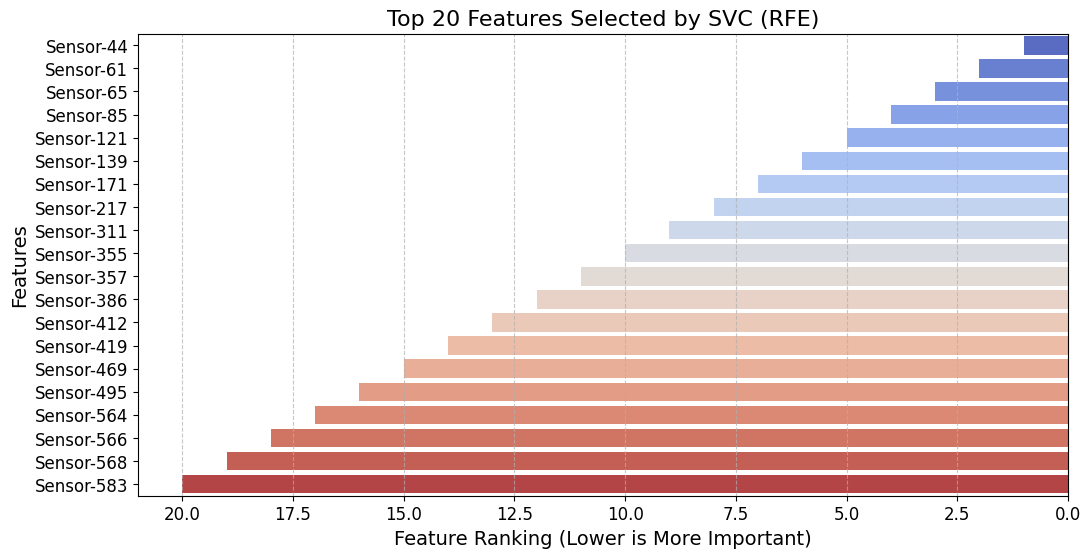

In [ ]:
# Extract selected features
selected_features = X.columns[rfe.support_]

# Create DataFrame for plotting
feature_ranking = pd.DataFrame({'Feature': selected_features, 'Ranking': range(1, 21)})
# Plot the feature ranking (Lower rank = More important)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_ranking['Ranking'], y=feature_ranking['Feature'], palette="coolwarm", orient='h')
plt.xlabel("Feature Ranking (Lower is More Important)", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Top 20 Features Selected by SVC (RFE)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.gca().invert_xaxis()  # Invert axis (Rank 1 should be most important)
plt.show()